In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("a_east_2.csv")
df

,Time,X,Y,Z,Vx,Vy,Vz,dVel_X,dVel_Y,dVel_Z,Alt(m)
0,0.1,-2898207.63,4027634.23,3994019.28,-0.51,0.71,0.71,-5.13,7.12386,7.13215,40.17
1,0.2,-2898207.76,4027634.41,3994019.45,-1.03,1.43,1.43,-5.13,7.13031,7.15602,40.45
2,0.3,-2898207.94,4027634.66,3994019.70,-1.54,2.14,2.14,-5.15,7.15218,7.15649,40.85
3,0.4,-2898208.17,4027634.98,3994020.03,-2.06,2.86,2.86,-5.16,7.17512,7.15524,41.36
4,0.5,-2898208.46,4027635.37,3994020.42,-2.57,3.58,3.58,-5.17,7.19137,7.16411,41.98
...,...,...,...,...,...,...,...,...,...,...,...
2969,297.0,-3140397.74,3849309.79,3987299.20,-267.06,-1073.03,-602.01,13.23,28.42361,13.08598,340.97
2970,297.1,-3140424.24,3849202.91,3987239.19,-265.74,-1070.17,-600.70,13.24,28.56094,13.17214,251.88
2971,297.2,-3140450.62,3849096.33,3987179.32,-264.41,-1067.30,-599.37,13.26,28.69653,13.25742,162.98
2972,297.3,-3140476.86,3848990.03,3987119.59,-263.09,-1064.42,-598.04,13.27,28.83037,13.34180,74.28


In [3]:
df.dtypes

Time      float64
X         float64
Y         float64
Z         float64
Vx        float64
Vy        float64
Vz        float64
dVel_X    float64
dVel_Y    float64
dVel_Z    float64
Alt(m)    float64
dtype: object

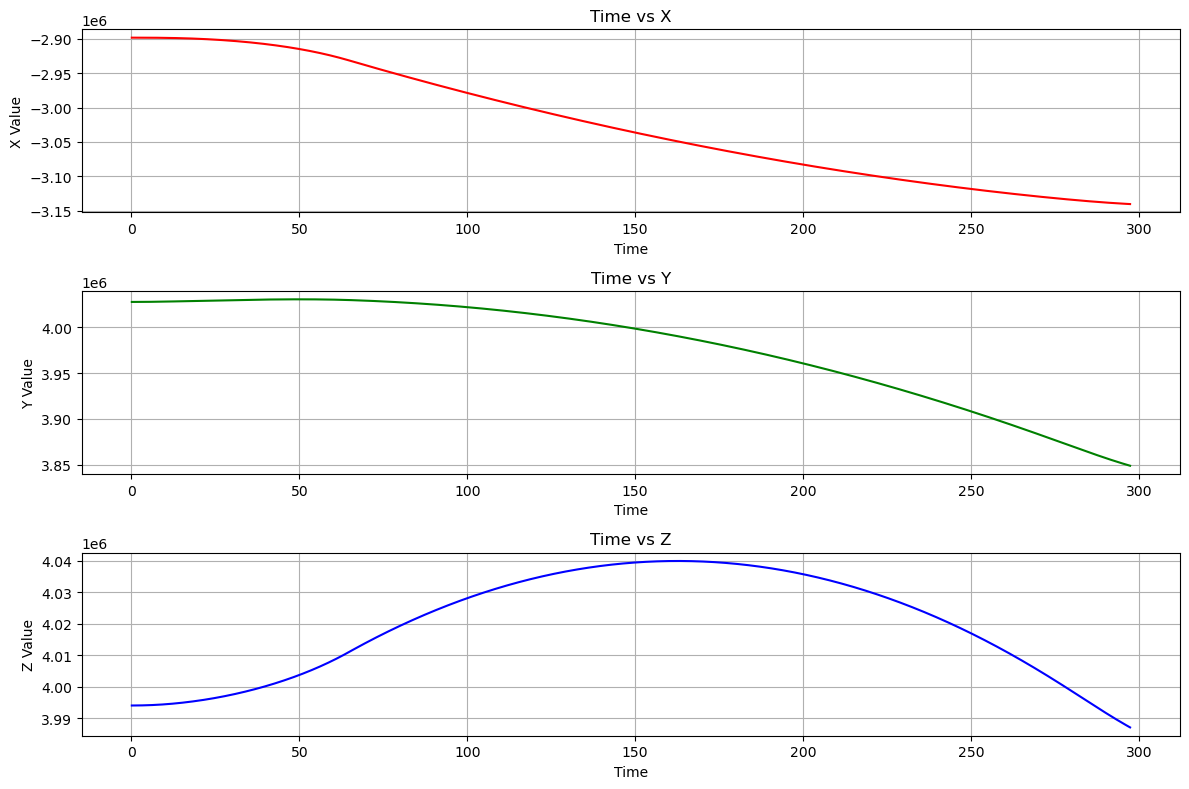

In [4]:
plt.figure(figsize=(12, 8))

# 'X' 값에 대한 그래프
plt.subplot(3, 1, 1)
plt.plot(df['Time'], df['X'], label='X', color='red')
plt.title('Time vs X')
plt.xlabel('Time')
plt.ylabel('X Value')
plt.grid(True)

# 'Y' 값에 대한 그래프
plt.subplot(3, 1, 2)
plt.plot(df['Time'], df['Y'], label='Y', color='green')
plt.title('Time vs Y')
plt.xlabel('Time')
plt.ylabel('Y Value')
plt.grid(True)

# 'Z' 값에 대한 그래프
plt.subplot(3, 1, 3)
plt.plot(df['Time'], df['Z'], label='Z', color='blue')
plt.title('Time vs Z')
plt.xlabel('Time')
plt.ylabel('Z Value')
plt.grid(True)

plt.tight_layout()
plt.show()

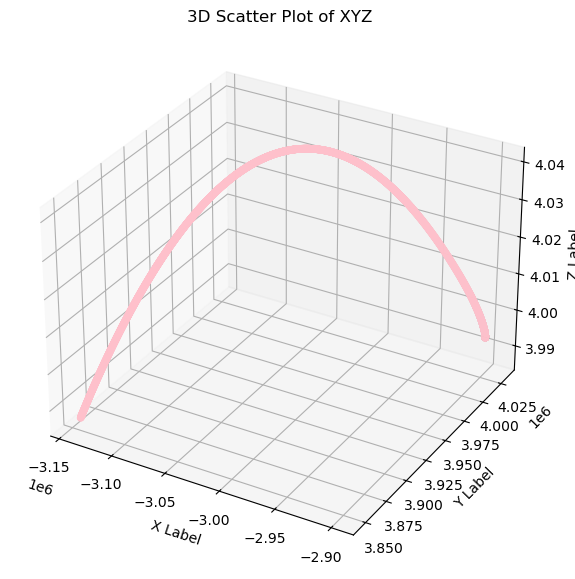

In [5]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['X'], df['Y'], df['Z'], c='pink', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.set_title('3D Scatter Plot of XYZ')

plt.show()

In [6]:
df_filtered_origin = df.loc[~((df['Time'] > 20.) & (df['Time'] < 50.) |
                       (df['Time'] > 130.) & (df['Time'] < 170.) |
                       (df['Time'] > 230.) & (df['Time'] < 260.))]

In [7]:
df_filtered = df_filtered_origin.copy()

In [8]:
df_filtered = df_filtered.reset_index(drop=True)

In [9]:
import numpy as np
import pandas as pd

In [10]:
time_square = max(len(str(time).split('.')[1]) for time in df_filtered.Time if '.' in str(time))

In [11]:
df_filtered.Time = (df_filtered.Time * 10 ** time_square).round().astype(int)

interval_list = []

for i in range(1, len(df_filtered)):
    interval = df_filtered.Time[i] - df_filtered.Time[i-1]
    interval_list.append(interval)

In [12]:
max(interval_list)

400

In [13]:
def gcd(a, b):
    while b != 0:
        a, b = b, a%b
    return a

In [14]:
temp = interval_list[0]
for i in range(1, len(interval_list)):
    temp = gcd(temp, interval_list[i])

In [15]:
interval = temp

In [16]:
interval

1

In [17]:
time_cursor = df_filtered.Time[0]
last_time = df_filtered.iloc[-1].Time
time_set = set(df_filtered['Time'])
while last_time != time_cursor:
    time_cursor += interval
    if not time_cursor in time_set:
        temp_df = pd.DataFrame([time_cursor], columns=['Time'])
        df_filtered = pd.concat([df_filtered, temp_df])

In [18]:
df_filtered = df_filtered.sort_values(by='Time').reset_index(drop=True)

In [19]:
df_filtered.head(10)

,Time,X,Y,Z,Vx,Vy,Vz,dVel_X,dVel_Y,dVel_Z,Alt(m)
0,1,-2898207.63,4027634.23,3994019.28,-0.51,0.71,0.71,-5.13,7.12386,7.13215,40.17
1,2,-2898207.76,4027634.41,3994019.45,-1.03,1.43,1.43,-5.13,7.13031,7.15602,40.45
2,3,-2898207.94,4027634.66,3994019.70,-1.54,2.14,2.14,-5.15,7.15218,7.15649,40.85
3,4,-2898208.17,4027634.98,3994020.03,-2.06,2.86,2.86,-5.16,7.17512,7.15524,41.36
4,5,-2898208.46,4027635.37,3994020.42,-2.57,3.58,3.58,-5.17,7.19137,7.16411,41.98
5,6,-2898208.79,4027635.84,3994020.89,-3.09,4.30,4.29,-5.18,7.20338,7.17944,42.72
6,7,-2898209.18,4027636.38,3994021.42,-3.61,5.02,5.01,-5.19,7.21475,7.19580,43.58
7,8,-2898209.62,4027636.99,3994022.03,-4.13,5.74,5.74,-5.20,7.22681,7.21113,44.54
8,9,-2898210.11,4027637.67,3994022.71,-4.65,6.47,6.46,-5.21,7.23952,7.22549,45.63
9,10,-2898210.65,4027638.43,3994023.47,-5.17,7.19,7.18,-5.22,7.25259,7.23932,46.83


In [20]:
# def interpolate(df):
#     from scipy.interpolate import interp1d
    
#     temp_df = df
#     # 'Time'에 따라 보간할 컬럼을 지정
#     for column in ['X', 'Y', 'Z']:
#         valid = ~df[column].isnull()
#         if valid.any():  # 유효한 데이터가 있는 경우에만 보간
#             interpolator = interp1d(df.loc[valid, 'Time'], df.loc[valid, column], 
#                                     kind='cubic', fill_value='extrapolate')
#             # 누락된 데이터가 있는 시간에 대해서만 값을 보간
#             temp_df[column] = interpolator(df['Time'])
        
#     return temp_df

In [21]:
# temp_df = interpolate(df_filtered)

In [22]:
# temp_df.tail(50)

In [23]:
def interpolate(df, kind):
    from scipy.interpolate import interp1d
    
    temp_df = df.copy()
    for column in ['X', 'Y', 'Z']:
        valid = ~temp_df[column].isnull()
        if valid.any():
            interpolator = interp1d(temp_df.loc[valid, 'Time'], temp_df.loc[valid, column], 
                                    kind=kind, fill_value='extrapolate')
            temp_df.loc[:, column] = interpolator(df['Time'])
    
    return temp_df

In [24]:
kinds = ['linear', 'nearest', 'slinear', 'quadratic', 'cubic']
results = {}

for kind in kinds:
    results[kind] = interpolate(df_filtered, kind)

In [25]:
linear_interpolated = results['linear']
nearest_interpolated = results['nearest']
slinear_interpolated = results['slinear']
quadratic_interpolated = results['quadratic']
cubic_interpolated = results['cubic']

In [26]:
df_filtered_origin.isnull().count()

Time      1977
X         1977
Y         1977
Z         1977
Vx        1977
Vy        1977
Vz        1977
dVel_X    1977
dVel_Y    1977
dVel_Z    1977
Alt(m)    1977
dtype: int64

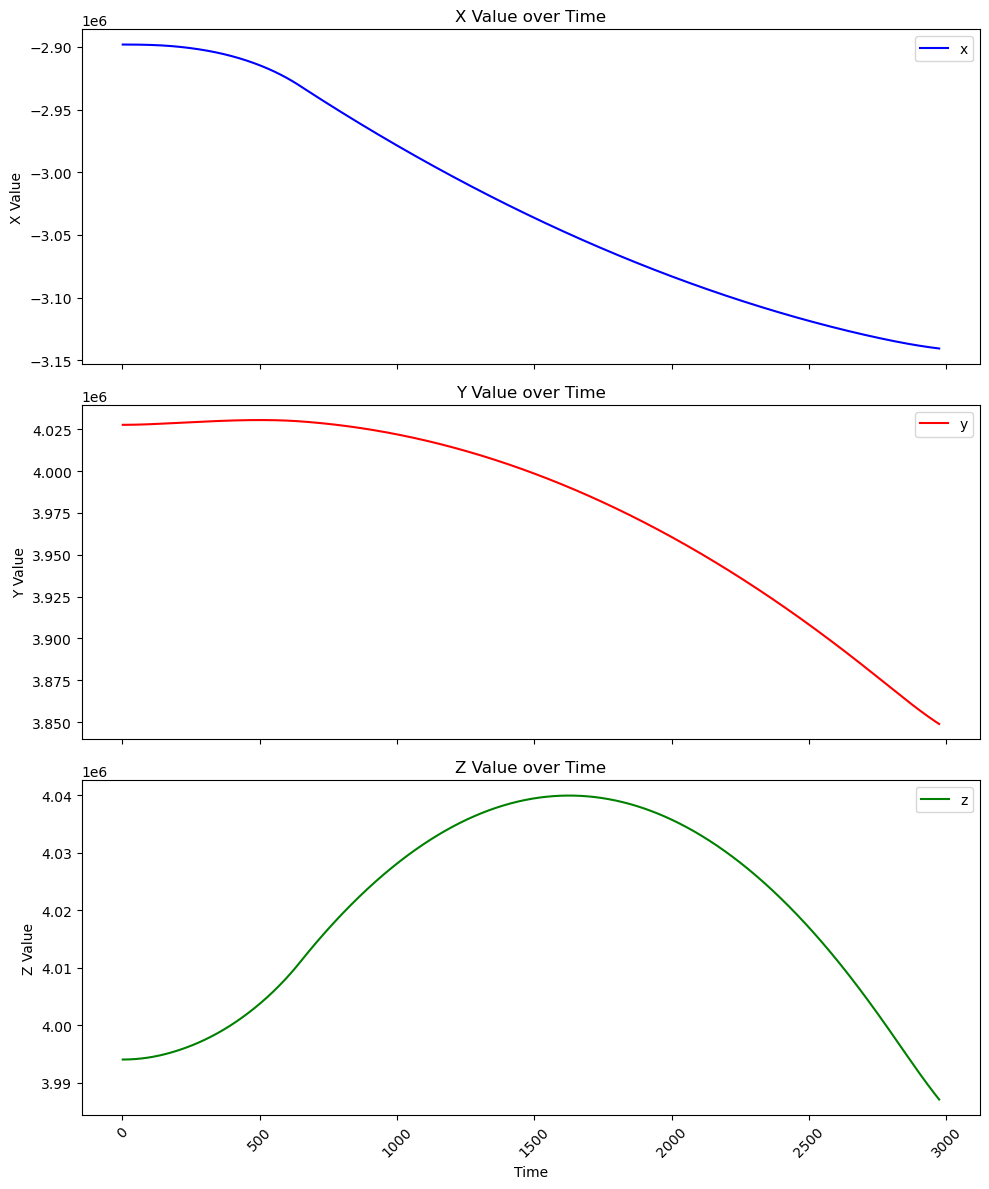

In [27]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# X 값 그래프
axs[0].plot(cubic_interpolated['Time'], cubic_interpolated['X'], label='x', color='blue')
axs[0].set_title('X Value over Time')
# axs[0].xaxis.set_major_formatter(time_format)
axs[0].set_ylabel('X Value')

# Y 값 그래프
axs[1].plot(cubic_interpolated['Time'], cubic_interpolated['Y'], label='y', color='red')
axs[1].set_title('Y Value over Time')
# axs[1].xaxis.set_major_formatter(time_format)
axs[1].set_ylabel('Y Value')

# Z 값 그래프
axs[2].plot(cubic_interpolated['Time'], cubic_interpolated['Z'], label='z', color='green')
axs[2].set_title('Z Value over Time')
# axs[2].xaxis.set_major_formatter(time_format)
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Z Value')

# 축 레이블 회전 및 레이아웃 조정
for ax in axs:
    ax.legend()
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
plt.tight_layout()
plt.show()


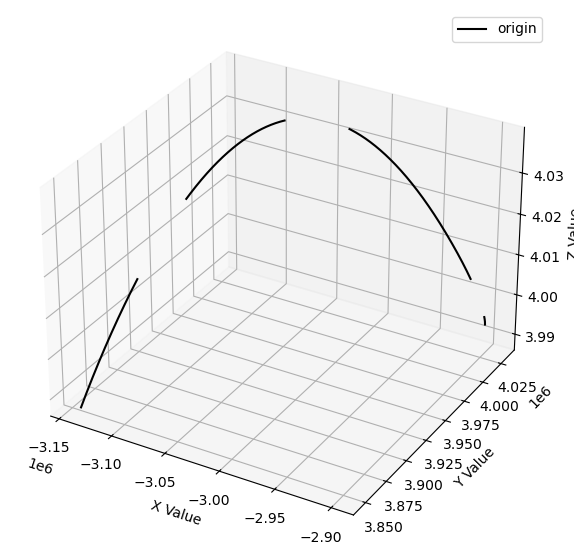

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 각 보간 방법에 대한 데이터를 그래프에 추가

ax.plot3D(df_filtered['X'], df_filtered['Y'], df_filtered['Z'], 'black', label='origin')


ax.set_xlabel('X Value')
ax.set_ylabel('Y Value')
ax.set_zlabel('Z Value')
ax.legend()


plt.show()


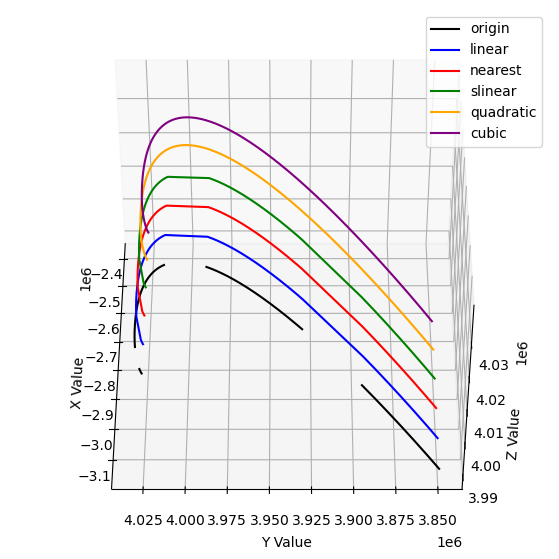

In [29]:
# 각 보간 방법에 따른 X 값의 오프셋을 설정
offsets = {
    'origin': 0,
    'linear': 100000,    
    'nearest': 200000,
    'slinear': 300000,
    'quadratic': 400000,
    'cubic': 500000   
}

# 3D 그래프를 그립니다.
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 각 보간 방법에 따른 데이터를 그래프에 추가
# X 값에 오프셋을 더하여 구분이 가도록
ax.plot3D(df_filtered['X'], df_filtered['Y'], df_filtered['Z'], 'black', label='origin')
ax.plot3D(linear_interpolated['X']+ offsets['linear'], linear_interpolated['Y'], linear_interpolated['Z'], 'blue', label='linear')
ax.plot3D(nearest_interpolated['X'] + offsets['nearest'], nearest_interpolated['Y'], nearest_interpolated['Z'], 'red', label='nearest')
ax.plot3D(slinear_interpolated['X'] + offsets['slinear'], slinear_interpolated['Y'], slinear_interpolated['Z'], 'green', label='slinear')
ax.plot3D(quadratic_interpolated['X'] + offsets['quadratic'], quadratic_interpolated['Y'], quadratic_interpolated['Z'], 'orange', label='quadratic')
ax.plot3D(cubic_interpolated['X'] + offsets['cubic'], cubic_interpolated['Y'], cubic_interpolated['Z'], 'purple', label='cubic')


ax.set_xlabel('X Value')
ax.set_ylabel('Y Value')
ax.set_zlabel('Z Value')
ax.view_init(elev=45, azim=180)
ax.legend()

plt.show()


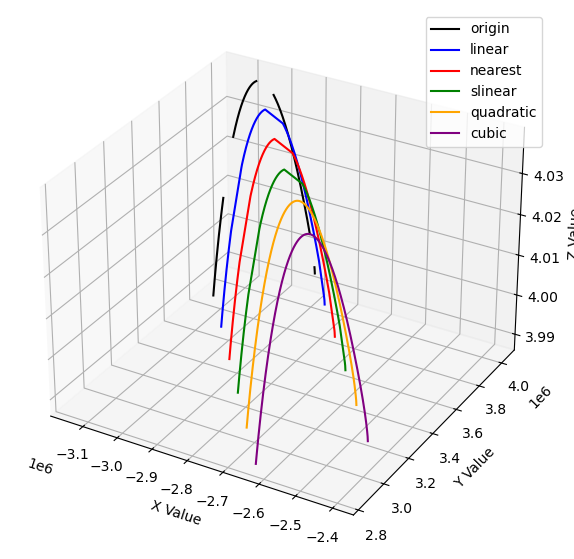

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 각 보간 방법에 따른 X 값의 오프셋을 설정합니다.
offsets = {
    'origin': 0,
    'linear': 100000,      # linear는 오프셋을 주지 않습니다.
    'nearest': 200000, # nearest에는 10000을 더합니다.
    'slinear': 300000, # slinear에는 20000을 더합니다.
    'quadratic': 400000, # quadratic에는 30000을 더합니다.
    'cubic': 500000   # cubic에는 40000을 더합니다.
}

# 3D 그래프를 그립니다.
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 각 보간 방법에 따른 데이터를 그래프에 추가합니다.
# X 값에 오프셋을 더하여 구분이 가도록 합니다.
ax.plot3D(df_filtered['X'], df_filtered['Y'], df_filtered['Z'], 'black', label='origin')
ax.plot3D(linear_interpolated['X']+ offsets['linear'], linear_interpolated['Y'] - 2 * offsets['linear'], linear_interpolated['Z'], 'blue', label='linear')
ax.plot3D(nearest_interpolated['X'] + offsets['nearest'], nearest_interpolated['Y'] - 2 * offsets['nearest'], nearest_interpolated['Z'], 'red', label='nearest')
ax.plot3D(slinear_interpolated['X'] + offsets['slinear'], slinear_interpolated['Y'] - 2 * offsets['slinear'], slinear_interpolated['Z'], 'green', label='slinear')
ax.plot3D(quadratic_interpolated['X'] + offsets['quadratic'], quadratic_interpolated['Y'] - 2 * offsets['quadratic'], quadratic_interpolated['Z'], 'orange', label='quadratic')
ax.plot3D(cubic_interpolated['X'] + offsets['cubic'], cubic_interpolated['Y'] - 2 * offsets['cubic'], cubic_interpolated['Z'], 'purple', label='cubic')

# 레이블과 범례를 추가합니다.
ax.set_xlabel('X Value')
ax.set_ylabel('Y Value')
ax.set_zlabel('Z Value')
ax.legend()

# 그래프를 표시합니다.
plt.show()

In [31]:
# # 데이터프레임 전체 다 나오게하기
# pd.set_option('display.max_rows', None)